## Hausarbeit - Abgabe 3 - Aufgabe 1
• Implementieren Sie das in der Vorlesung gezeigte “Gradient Descent” 
Beispiel in numpy

• Implementieren Sie eine Ausgleichsgerade mit dem Verfahren der 
kleinsten Quadrate für die in der Vorlesung gezeigten Daten
### Laden der nötigen Bibliotheken

In [81]:
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt 

### 1. Aufgabe:
Implementieren Sie das in der Vorlesung gezeigte “Gradient Descent” 
Beispiel in numpy

In [82]:
### Gradient Descent: 

# 1.Schritt: Einlesen der Daten: 
values = np.loadtxt('vl5_data.csv')

# 2.Schritt: Aufteilen der Daten in die gegebenen Einheiten
t_u = np.array(values[:,1])   # temperature in Celsius
t_c = np.array(values[:,0])   # unknown units

In [83]:
# 3.Schritt: Definition der Funktionen
def model(t_u, w, b):
    return w * t_u + b

In [84]:
# 4.Schritt: Definition der Ableitungen
### DERIVATIVES ###
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / np.size(t_p, 0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [85]:
# 5.Schritt: Berechnung des Gradientens und des Training Loops
## Definition Gradient
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return np.stack([dloss_dw.sum(), dloss_db.sum()])

## Definition Training Loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):

        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad

        # Ausgabe der einzelnen Epochen
        # print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [86]:
# 6.Schritt: Durchführung der Berechnung der Parameter für die Gerade
# Normierung der Werte t_u
t_un = 0.1 * t_u


params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = np.array([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

params

# Berechnung des Models
t_p = model(t_un, *params)

Epoch 1, Loss 80.364345
Epoch 2, Loss 37.574914
Epoch 3, Loss 30.871081
Epoch 4, Loss 29.756196
Epoch 5, Loss 29.507148
Epoch 6, Loss 29.392454
Epoch 7, Loss 29.298827
Epoch 8, Loss 29.208719
Epoch 9, Loss 29.119414
Epoch 10, Loss 29.030488
Epoch 11, Loss 28.941876
Epoch 12, Loss 28.853567
Epoch 13, Loss 28.765558
Epoch 14, Loss 28.677847
Epoch 15, Loss 28.590435
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243741
Epoch 20, Loss 28.157802
Epoch 21, Loss 28.072155
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901732
Epoch 24, Loss 27.816954
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648260
Epoch 27, Loss 27.564343
Epoch 28, Loss 27.480710
Epoch 29, Loss 27.397361
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149009
Epoch 33, Loss 27.066786
Epoch 34, Loss 26.984842
Epoch 35, Loss 26.903177
Epoch 36, Loss 26.821789
Epoch 37, Loss 26.740677
Epoch 38, Loss 26.659840
Epoch 39, Loss 26.579278
Epoch 40, Loss 26.498989
Epoch 41,

Text(0, 0.5, 'Temperature (°Celsius)')

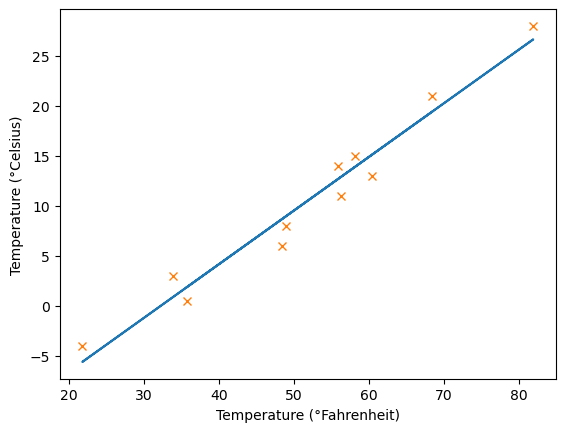

In [87]:
# 7.Schritt: Darstellung der Geraden zusammen mit den Daten
fig = plt.figure()
plt.plot(t_u, t_p)
plt.plot(t_u, t_c, 'x')
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")

## Hausarbeit - Abgabe 3 - Aufgabe 2

### 2. Aufgabe
Implementieren Sie eine Ausgleichsgerade mit dem Verfahren der 
kleinsten Quadrate für die in der Vorlesung gezeigten Daten